# MVP Predictions #

In [1]:
# -*- coding: utf-8 -*-#
"""
Created by MinhKhang Nguyen
July 27 2021 7:37 PM - August 6 2021 2:08 AM
"""

'\nCreated by MinhKhang Nguyen\nJuly 27 2021 7:37 PM - August 6 2021 2:08 AM\n'

In [2]:
import pandas as pd 
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import ssl
ssl._create_default_https_econtext = ssl._create_unverified_context

#### Importing Data ####

###### Importing Normal Stats ######

In [4]:
html_url = "https://www.basketball-reference.com/leagues/NBA_2022_per_game.html"
nba_tables = pd.read_html(html_url)
len(nba_tables)
nba = nba_tables[0]
nba.head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,22,TOR,3,3,25.7,4.3,10.0,...,.571,3.0,8.3,11.3,1.7,1.0,0.0,0.7,2.3,10.3
1,2,Steven Adams,C,28,MEM,2,2,29.5,5.0,8.0,...,1.000,5.5,6.0,11.5,4.0,1.5,0.5,1.5,0.0,12.5
2,3,Bam Adebayo,C,24,MIA,2,2,31.5,7.5,14.0,...,.636,3.0,11.5,14.5,2.0,1.0,0.5,4.0,3.5,18.5
3,4,LaMarcus Aldridge,C,36,BRK,2,0,19.0,5.0,7.0,...,.571,1.0,3.0,4.0,0.5,0.0,1.5,0.5,2.5,12.0
4,5,Nickeil Alexander-Walker,SG,23,NOP,3,3,34.0,6.3,16.3,...,.833,2.7,5.3,8.0,1.3,2.3,1.0,3.0,1.7,17.3
5,6,Grayson Allen,SG,26,MIL,3,3,27.3,4.0,10.7,...,1.000,0.0,4.0,4.0,2.7,1.0,0.0,0.3,0.7,11.3
6,7,Jarrett Allen,C,23,CLE,3,3,29.3,7.0,8.7,...,.714,0.7,6.7,7.3,1.0,1.7,1.0,2.0,2.0,15.7
7,8,Kyle Anderson,PF,28,MEM,2,0,19.5,2.0,8.0,...,1.000,1.5,5.5,7.0,2.5,1.5,0.5,0.0,1.0,7.0
8,9,Giannis Antetokounmpo,PF,27,MIL,3,3,28.0,7.7,17.0,...,.704,2.0,8.7,10.7,5.7,1.3,1.7,3.7,3.7,22.7
9,10,Thanasis Antetokounmpo,SF,29,MIL,3,0,17.3,2.0,3.3,...,.800,2.0,3.0,5.0,1.3,0.0,0.3,1.0,2.3,5.3


In [5]:
nba.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

###### Importing Advanced Stats ######

In [6]:
html_url = "https://www.basketball-reference.com/leagues/NBA_2022_advanced.html"
advanced_tables = pd.read_html(html_url)
len(advanced_tables)
advanced = advanced_tables[0]
advanced.head(30)

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,PF,22,TOR,3,77,17.4,.469,.100,...,NaN,0.1,0.2,0.3,.190,NaN,0.4,0.3,0.7,0.0
1,2,Steven Adams,C,28,MEM,2,59,28.5,.687,.000,...,NaN,0.3,0.0,0.3,.269,NaN,11.6,3.3,14.8,0.1
2,3,Bam Adebayo,C,24,MIA,2,63,19.0,.563,.000,...,NaN,0.0,0.2,0.2,.179,NaN,-1.6,2.9,1.3,0.0
3,4,LaMarcus Aldridge,C,36,BRK,2,38,24.8,.703,.071,...,NaN,0.2,0.0,0.1,.188,NaN,10.2,0.8,11.1,0.1
4,5,Nickeil Alexander-Walker,SG,23,NOP,3,102,14.8,.503,.551,...,NaN,-0.1,0.1,0.0,.024,NaN,-2.5,-0.7,-3.2,0.0
5,6,Grayson Allen,SG,26,MIL,3,82,13.3,.510,.813,...,NaN,0.1,0.0,0.1,.068,NaN,-1.2,-4.2,-5.4,0.0
6,7,Jarrett Allen,C,23,CLE,3,88,22.6,.808,.000,...,NaN,0.2,0.1,0.3,.152,NaN,-2.2,-1.6,-3.7,0.0
7,8,Kyle Anderson,PF,28,MEM,2,39,17.9,.394,.375,...,NaN,0.1,0.0,0.1,.125,NaN,-6.4,-4.5,-10.9,0.0
8,9,Giannis Antetokounmpo,PF,27,MIL,3,84,27.4,.541,.176,...,NaN,0.2,0.1,0.3,.159,NaN,1.1,1.1,2.2,0.1
9,10,Thanasis Antetokounmpo,SF,29,MIL,3,52,14.0,.656,.000,...,NaN,0.1,0.0,0.1,.123,NaN,-3.1,-4.6,-7.6,-0.1


In [7]:
advanced.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'Unnamed: 19', 'OWS', 'DWS', 'WS', 'WS/48', 'Unnamed: 24', 'OBPM',
       'DBPM', 'BPM', 'VORP'],
      dtype='object')

#### Cleaning DataFrame ####

###### Cleaning Normal Stats ######

In [8]:
#renames columns to strings only#
nba.rename(
    columns={
        'FG%': 'FGP',
        '3P': 'TP',
        '3PA': 'TPA',
        '3P%': 'TPP',
        '2P': 'TWOP',
        '2PA': 'TWOPA',
        '2P%': 'TWOPP',
        'eFG%': 'eFGP',
        'FT%': 'FTP'
    }, inplace=True)

#removing duplicate players (stats of players that played on different teams)#
nba.drop_duplicates(subset=['Player'], keep=False, inplace=True)
#Dropping "Rk" Column#
nba.drop('Rk', axis=1, inplace=True)

#replacing NaN with 0#
nba.fillna(0, inplace=True)

nba[["G", "GS","MP","FG","FGA","FGP","TP","TPA","TPP","TWOP","TWOPA","TWOPP","eFGP","FT","FTA","FTP","ORB","DRB","TRB","AST","STL","BLK","TOV","PF","PTS"]] = nba[["G", "GS","MP","FG","FGA","FGP","TP","TPA","TPP","TWOP","TWOPA","TWOPP","eFGP","FT","FTA","FTP","ORB","DRB","TRB","AST","STL","BLK","TOV","PF","PTS"]].apply(pd.to_numeric)
nba

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,22,TOR,3,3,25.7,4.3,10.0,0.433,...,0.571,3.0,8.3,11.3,1.7,1.0,0.0,0.7,2.3,10.3
1,Steven Adams,C,28,MEM,2,2,29.5,5.0,8.0,0.625,...,1.000,5.5,6.0,11.5,4.0,1.5,0.5,1.5,0.0,12.5
2,Bam Adebayo,C,24,MIA,2,2,31.5,7.5,14.0,0.536,...,0.636,3.0,11.5,14.5,2.0,1.0,0.5,4.0,3.5,18.5
3,LaMarcus Aldridge,C,36,BRK,2,0,19.0,5.0,7.0,0.714,...,0.571,1.0,3.0,4.0,0.5,0.0,1.5,0.5,2.5,12.0
4,Nickeil Alexander-Walker,SG,23,NOP,3,3,34.0,6.3,16.3,0.388,...,0.833,2.7,5.3,8.0,1.3,2.3,1.0,3.0,1.7,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,Thaddeus Young,PF,33,SAS,1,0,9.0,1.0,3.0,0.333,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
399,Trae Young,PG,23,ATL,2,2,34.0,7.0,19.0,0.368,...,1.000,0.0,1.5,1.5,10.5,2.0,0.0,3.5,0.5,21.5
400,Omer Yurtseven,C,23,MIA,1,0,8.0,4.0,6.0,0.667,...,0.000,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,8.0
401,Cody Zeller,C,29,POR,2,0,16.0,2.0,2.5,0.800,...,0.500,1.0,4.0,5.0,1.0,0.5,0.5,0.0,2.5,5.0


###### Cleaning Advanced Stats ######

In [9]:
advanced.rename(
    columns={
        'WS': 'Win Shares',
        'BPM': 'Avg. Box +/-'
    }, inplace=True)

#removing duplicate players (stats of players that played on different teams)#
advanced.drop_duplicates(subset=['Player'], keep=False, inplace=True)
#Dropping "Rk" Column#
advanced.drop('Rk', axis=1, inplace=True)

#replacing NaN with 0#
advanced.fillna(0, inplace=True)

advanced[['Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr','ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%','Unnamed: 19', 'OWS', 'DWS', 'Win Shares', 'WS/48', 'Unnamed: 24', 'OBPM','DBPM', 'Avg. Box +/-', 'VORP']] = advanced[['Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr','ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%','Unnamed: 19', 'OWS', 'DWS', 'Win Shares', 'WS/48', 'Unnamed: 24', 'OBPM','DBPM', 'Avg. Box +/-', 'VORP']].apply(pd.to_numeric)
advanced.drop(['Player','Pos','Age','Tm','G','MP','TS%','3PAr','FTr','ORB%','DRB%','TRB%','AST%','STL%','BLK%','TOV%','USG%','OWS','DWS','WS/48','OBPM','DBPM','VORP','Unnamed: 19','Unnamed: 24'], axis=1, inplace=True)
shorter_advanced = advanced
shorter_advanced

,PER,Win Shares,Avg. Box +/-
0,17.4,0.3,0.7
1,28.5,0.3,14.8
2,19.0,0.2,1.3
3,24.8,0.1,11.1
4,14.8,0.0,-3.2
...,...,...,...
397,-11.5,-0.1,-21.7
399,20.6,0.2,3.8
400,32.6,0.0,0.1
401,18.3,0.2,-2.8


In [10]:
nba = nba.loc[~nba.index.duplicated(keep='first')]
shorter_advanced = shorter_advanced.loc[~shorter_advanced.index.duplicated(keep='first')]
full = pd.concat([nba, shorter_advanced], axis=1)
full

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGP,...,TRB,AST,STL,BLK,TOV,PF,PTS,PER,Win Shares,Avg. Box +/-
0,Precious Achiuwa,PF,22,TOR,3,3,25.7,4.3,10.0,0.433,...,11.3,1.7,1.0,0.0,0.7,2.3,10.3,17.4,0.3,0.7
1,Steven Adams,C,28,MEM,2,2,29.5,5.0,8.0,0.625,...,11.5,4.0,1.5,0.5,1.5,0.0,12.5,28.5,0.3,14.8
2,Bam Adebayo,C,24,MIA,2,2,31.5,7.5,14.0,0.536,...,14.5,2.0,1.0,0.5,4.0,3.5,18.5,19.0,0.2,1.3
3,LaMarcus Aldridge,C,36,BRK,2,0,19.0,5.0,7.0,0.714,...,4.0,0.5,0.0,1.5,0.5,2.5,12.0,24.8,0.1,11.1
4,Nickeil Alexander-Walker,SG,23,NOP,3,3,34.0,6.3,16.3,0.388,...,8.0,1.3,2.3,1.0,3.0,1.7,17.3,14.8,0.0,-3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,Thaddeus Young,PF,33,SAS,1,0,9.0,1.0,3.0,0.333,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,-11.5,-0.1,-21.7
399,Trae Young,PG,23,ATL,2,2,34.0,7.0,19.0,0.368,...,1.5,10.5,2.0,0.0,3.5,0.5,21.5,20.6,0.2,3.8
400,Omer Yurtseven,C,23,MIA,1,0,8.0,4.0,6.0,0.667,...,3.0,0.0,0.0,0.0,0.0,0.0,8.0,32.6,0.0,0.1
401,Cody Zeller,C,29,POR,2,0,16.0,2.0,2.5,0.800,...,5.0,1.0,0.5,0.5,0.0,2.5,5.0,18.3,0.2,-2.8


#### Filtering DataFrame ####

###### Filtering Normal Stats ######

In [11]:
full.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FGP', 'TP',
       'TPA', 'TPP', 'TWOP', 'TWOPA', 'TWOPP', 'eFGP', 'FT', 'FTA', 'FTP',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER',
       'Win Shares', 'Avg. Box +/-'],
      dtype='object')

In [12]:
full[["G", "GS","MP","FG","FGA","FGP","TP","TPA","TPP","TWOP","TWOPA","TWOPP","eFGP","FT","FTA","FTP","ORB","DRB","TRB","AST","STL","BLK","TOV","PF","PTS"]] = nba[["G", "GS","MP","FG","FGA","FGP","TP","TPA","TPP","TWOP","TWOPA","TWOPP","eFGP","FT","FTA","FTP","ORB","DRB","TRB","AST","STL","BLK","TOV","PF","PTS"]].apply(pd.to_numeric)

In [13]:
#full.drop(full[full['G'] <= 33].index, inplace = True)#
full.drop(full[full['TP'] <= 0.1].index, inplace = True)
full.drop(full[full['TPA'] <= 0.1].index, inplace = True)
full.drop(full[full['TPP'] <= 0.1].index, inplace = True)
full.drop(full[full['PTS'] <= 21.1].index, inplace = True)

#### Processing the Data ####

In [14]:
for index, row in full.iterrows():
    full.loc[index, "Score"] = ((row['FGP']*row['TPP']*row['FTP'])*(row['PTS']+row['TRB']+row['STL']+row['AST']+row['BLK']-row['TOV']-(row['FGA']-row['FG']))*(1-row['eFGP']))*(row['PTS']+row['TRB']+row['STL']+(0.5*row['AST'])+(0.5*row['BLK'])-row['FGA']-row['TOV']-(0.5*row['FTA'])-(0.5*row['PF']))
    
#NBA Efficiency Metric = (Points)+(Rebounds)+(Steals)+(Assists)+(Blocked Shots)-(Turnovers)-(Missed Shots)#
#Win Score = (Points)+(Rebounds)+(Steals)+(½Assists)+(½Blocked Shots)-(Field Goal Attempts)-(Turnovers)-½(Free Throw Attempts)-½Personal Fouls#
#My equation = (((FG%*3P%*FT%)NBA Efficiency)(1-eFG%))(Win Score)#

In [15]:
full.sort_values(by=['Score'], ascending=False, inplace=True)
full.drop(['GS','MP','FG','FGA','TP','TPA','TWOP','TWOPA','TWOPP','eFGP','FT','FTA','FTP','ORB','DRB','STL','BLK','TOV','PF','Avg. Box +/-'], axis=1, inplace=True)
mvp = full.head(15)
mvp = mvp.copy()
mvp['Advanced Score'] = (mvp['PER']*mvp['Win Shares'])/100
mvp['MVP Score'] = round(mvp['Score']*mvp['Advanced Score'],2)
mvp.drop(['Score', 'Advanced Score'], axis=1, inplace=True)
mvp.sort_values(by=['MVP Score'], ascending=False, inplace=True)
mvp = mvp.rename({'FGP': 'FG%', 'TPP': '3P%', 'TRB': 'REB'}, axis='columns')

In [16]:
mvp

,Player,Pos,Age,Tm,G,FG%,3P%,REB,AST,PTS,PER,Win Shares,MVP Score
23,Harrison Barnes,PF,29,SAC,2,0.487,0.588,12.0,2.0,30.5,31.0,0.5,10.35
128,Paul George,SF,31,LAC,2,0.563,0.435,10.5,5.0,35.0,36.1,0.4,9.30
194,Nikola Jokić,C,26,DEN,2,0.659,0.375,14.5,4.5,29.5,35.5,0.5,7.67
17,LaMelo Ball,PG,20,CHO,2,0.543,0.667,6.0,6.5,24.0,32.1,0.4,6.94
108,Kevin Durant,PF,33,BRK,2,0.489,0.308,13.0,8.0,30.5,36.4,0.4,6.74
365,Karl-Anthony Towns,C,26,MIN,2,0.600,0.600,7.0,2.0,27.5,32.2,0.4,5.17
245,CJ McCollum,SG,30,POR,2,0.558,0.545,4.5,3.0,31.0,33.1,0.4,4.75
334,Domantas Sabonis,PF,25,IND,3,0.633,0.462,12.0,4.3,26.0,24.0,0.5,4.50
99,Spencer Dinwiddie,SG,28,WAS,2,0.500,0.667,5.0,7.5,23.5,28.7,0.4,4.12
91,Stephen Curry,PG,33,GSW,2,0.457,0.476,10.0,5.5,33.0,25.7,0.3,3.85


#### Visualization ####

###### PER vs MVP Score Plot ######

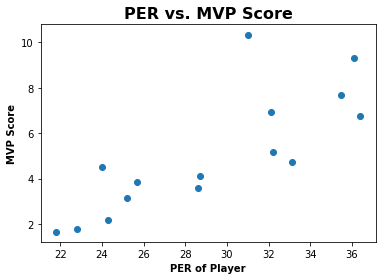

In [17]:
x = mvp['PER']
y = mvp['MVP Score']

plt.scatter(x, y)
plt.title('PER vs. MVP Score', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('PER of Player', fontdict={'fontweight':'bold'})
plt.ylabel('MVP Score', fontdict={'fontweight':'bold'})
plt.show()

In [18]:
#plt.savefig('PER vs. MVP Score.png')

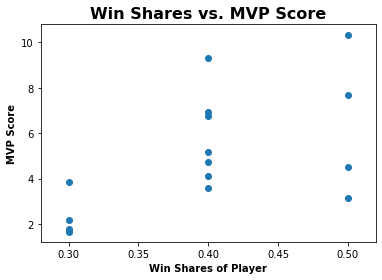

In [19]:
x = mvp['Win Shares']
y = mvp['MVP Score']

plt.scatter(x, y)
plt.title('Win Shares vs. MVP Score', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Win Shares of Player', fontdict={'fontweight':'bold'})
plt.ylabel('MVP Score', fontdict={'fontweight':'bold'})
plt.show()

In [20]:
#plt.savefig('Win Shares vs. MVP Score.png')

In [21]:
mvp.set_index(['Player', 'Pos', 'Age', 'Tm', 'G', 'REB', 'AST', 'PTS', 'FG%', '3P%', 'PER', 'Win Shares', 'MVP Score'], inplace=True)
mvp

,,,,,,,,,,,,
Player,Pos,Age,Tm,G,REB,AST,PTS,FG%,3P%,PER,Win Shares,MVP Score
Harrison Barnes,PF,29,SAC,2,12.0,2.0,30.5,0.487,0.588,31.0,0.5,10.35
Paul George,SF,31,LAC,2,10.5,5.0,35.0,0.563,0.435,36.1,0.4,9.30
Nikola Jokić,C,26,DEN,2,14.5,4.5,29.5,0.659,0.375,35.5,0.5,7.67
LaMelo Ball,PG,20,CHO,2,6.0,6.5,24.0,0.543,0.667,32.1,0.4,6.94
Kevin Durant,PF,33,BRK,2,13.0,8.0,30.5,0.489,0.308,36.4,0.4,6.74
Karl-Anthony Towns,C,26,MIN,2,7.0,2.0,27.5,0.600,0.600,32.2,0.4,5.17
CJ McCollum,SG,30,POR,2,4.5,3.0,31.0,0.558,0.545,33.1,0.4,4.75
Domantas Sabonis,PF,25,IND,3,12.0,4.3,26.0,0.633,0.462,24.0,0.5,4.50
Spencer Dinwiddie,SG,28,WAS,2,5.0,7.5,23.5,0.500,0.667,28.7,0.4,4.12


#### Exporting ####

###### MVP Table to CSV ######

In [22]:
import datetime

current_date = datetime.datetime.now()
filename = str(current_date.month)+"-"+str(current_date.day)+"-"+str(current_date.year)
output = mvp.to_csv(str("MVP " + filename))

In [23]:
mvp.to_csv(output)

'Player,Pos,Age,Tm,G,REB,AST,PTS,FG%,3P%,PER,Win Shares,MVP Score\r\nHarrison Barnes,PF,29,SAC,2,12.0,2.0,30.5,0.487,0.588,31.0,0.5,10.35\r\nPaul George,SF,31,LAC,2,10.5,5.0,35.0,0.563,0.435,36.1,0.4,9.3\r\nNikola Jokić,C,26,DEN,2,14.5,4.5,29.5,0.659,0.375,35.5,0.5,7.67\r\nLaMelo Ball,PG,20,CHO,2,6.0,6.5,24.0,0.543,0.667,32.1,0.4,6.94\r\nKevin Durant,PF,33,BRK,2,13.0,8.0,30.5,0.489,0.308,36.4,0.4,6.74\r\nKarl-Anthony Towns,C,26,MIN,2,7.0,2.0,27.5,0.6,0.6,32.2,0.4,5.17\r\nCJ McCollum,SG,30,POR,2,4.5,3.0,31.0,0.558,0.545,33.1,0.4,4.75\r\nDomantas Sabonis,PF,25,IND,3,12.0,4.3,26.0,0.633,0.462,24.0,0.5,4.5\r\nSpencer Dinwiddie,SG,28,WAS,2,5.0,7.5,23.5,0.5,0.667,28.7,0.4,4.12\r\nStephen Curry,PG,33,GSW,2,10.0,5.5,33.0,0.457,0.476,25.7,0.3,3.85\r\nChristian Wood,C,26,HOU,2,11.5,2.0,23.5,0.559,0.5,28.6,0.4,3.57\r\nZach LaVine,SG,26,CHI,3,5.7,4.7,26.7,0.519,0.45,25.2,0.5,3.14\r\nTobias Harris,PF,29,PHI,2,9.5,3.0,21.5,0.5,0.5,24.3,0.3,2.17\r\nMiles Bridges,PF,23,CHO,2,7.5,2.0,21.5,0.531,0.385,2